Importing The Necessary Libraries

In [40]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import zscore


Loading Dataset

In [5]:
# Load the dataset
df = pd.read_csv('/content/loan_prediction.csv')  # Ensure this path is correct
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Exploratory Data Analysis (EDA)

In [6]:
# Dataset Stats
print("Dataset Shape:", df.shape)

Dataset Shape: (614, 13)


In [7]:
#Printing the first 5 rows of dataset
print("First 5 Rows:\n", df.head())

First 5 Rows:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2    

In [8]:
#Printing the description of dataset
print("Dataset Description:\n", df.describe())

Dataset Description:
        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


Data Preprocessing

In [9]:
# Droping unnecessary column
df.drop(columns=['Loan_ID'], inplace=True)  # Dropping the identifier column

Feature Engineering

In [10]:
# Adding TotalIncome column
# Here we are adding a new feature 'TotalIncome' by combining 'ApplicantIncome' and 'CoapplicantIncome'
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [11]:
# Dropping the original 'ApplicantIncome' and 'CoapplicantIncome' columns as they are now redundant
df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

Handling missing values

In [12]:
# Checking for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64


In [13]:
# Fill missing values for categorical columns with mode and numerical columns with median
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

Encoding categorical variables

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
# Here we are using LabelEncoder to convert categorical variables into numerical values
le = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

Data Visualization

Creating data visualizations to explore the relationships between various features

([<matplotlib.axis.XTick at 0x7ccec8f1dd80>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

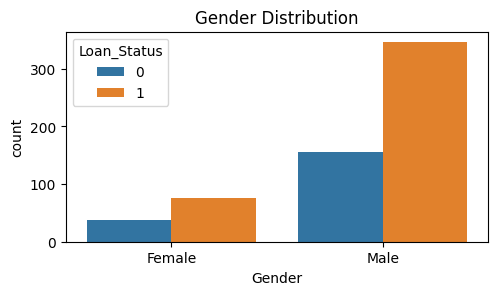

In [16]:
# Count plot for Gender
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.countplot(x='Gender',hue ='Loan_Status', data=df)
plt.title('Gender Distribution')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

([<matplotlib.axis.XTick at 0x7ccec6cd1900>,
 [Text(0, 0, 'Not Married'), Text(1, 0, 'Married')])

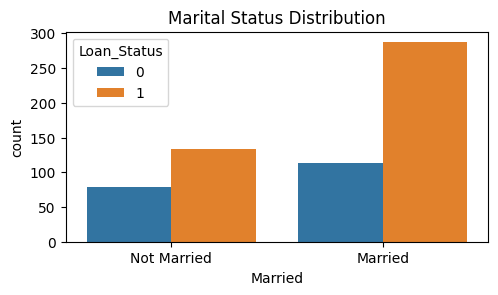

In [17]:
# Count plot for Married status
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 2)
sns.countplot(x='Married',hue='Loan_Status', data=df)
plt.title('Marital Status Distribution')
plt.xticks(ticks=[0, 1], labels=['Not Married', 'Married'])

([<matplotlib.axis.XTick at 0x7ccec6d49f60>,
 [Text(0, 0, 'Not Graduate'), Text(1, 0, 'Graduate')])

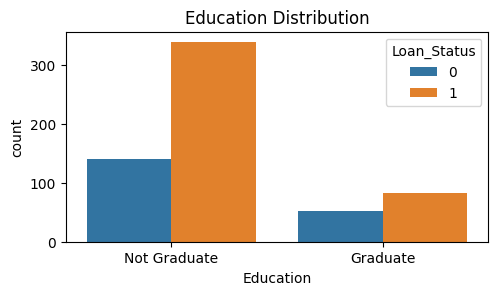

In [18]:
# Count plot for Education
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
sns.countplot(x='Education',hue='Loan_Status', data=df)
plt.title('Education Distribution')
plt.xticks(ticks=[0, 1], labels=['Not Graduate', 'Graduate'])

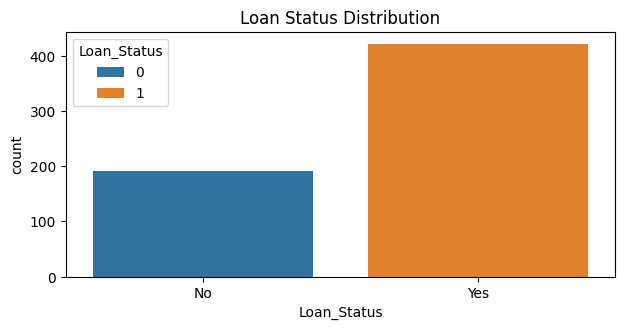

In [19]:
# Count plot for Loan Status
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 4)
sns.countplot(x='Loan_Status',hue='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

Correlation Heatmap

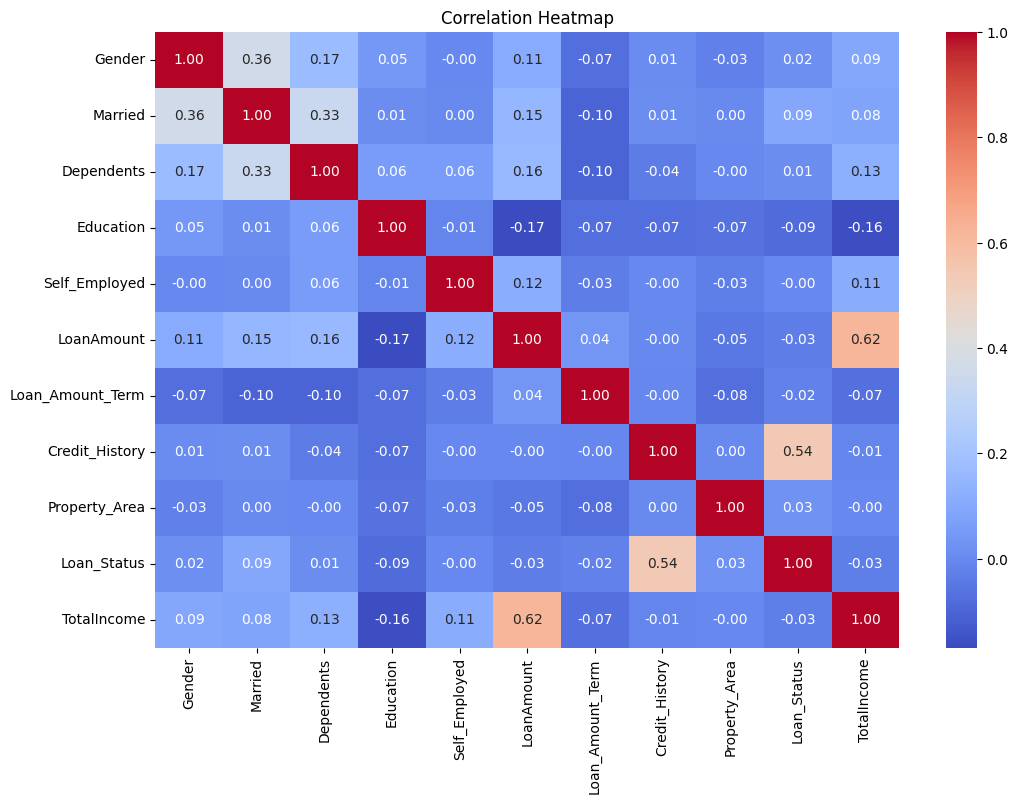

In [20]:
# Here we are plotting a correlation heatmap to understand relationships between features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Identifying and Removing Outliers

Text(0.5, 1.0, 'Total Income Boxplot')

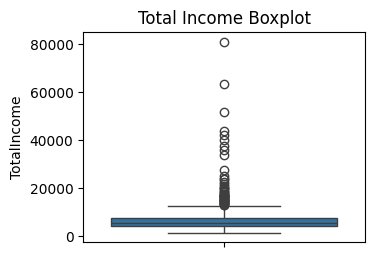

In [21]:
# Visualizing Outliers using Boxplots
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
sns.boxplot(df['TotalIncome'])
plt.title("Total Income Boxplot")

Text(0.5, 1.0, 'Loan Amount Boxplot ')

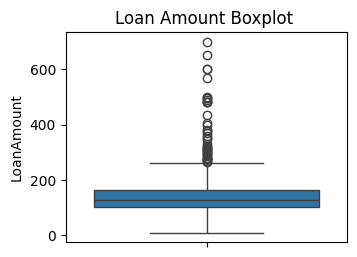

In [22]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 2)
sns.boxplot(df['LoanAmount'])
plt.title("Loan Amount Boxplot ")

Text(0.5, 1.0, 'Loan Amount Term Boxplot')

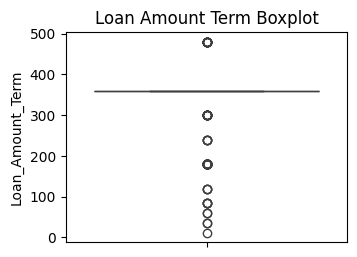

In [23]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 3)
sns.boxplot(df['Loan_Amount_Term'])
plt.title("Loan Amount Term Boxplot")

Text(0.5, 1.0, 'Credit History Boxplot ')

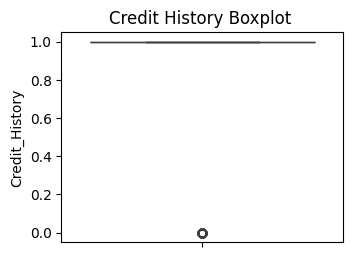

In [24]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 4)
sns.boxplot(df['Credit_History'])
plt.title("Credit History Boxplot ")


In [25]:
# Removing Outliers using Z-Score Method
z_scores = np.abs(zscore(df[['TotalIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]))
df = df[(z_scores < 3).all(axis=1)]

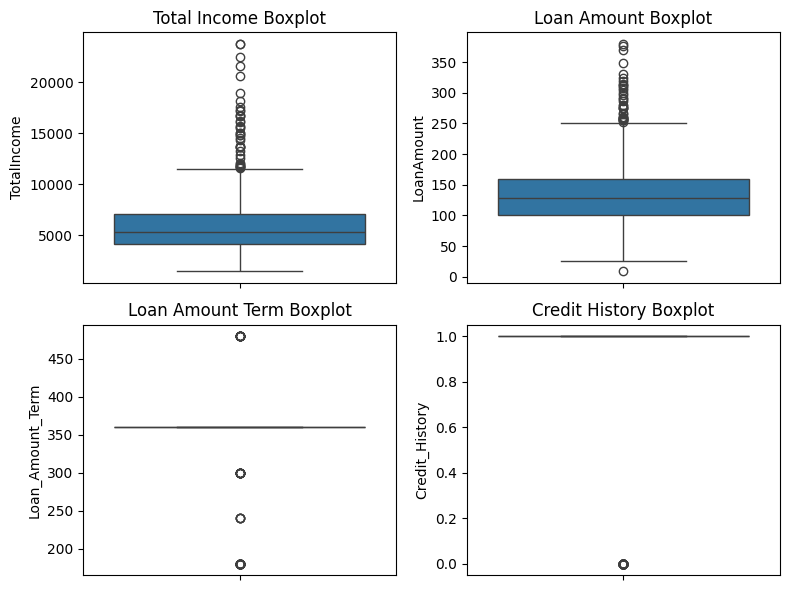

In [26]:
# Visualize Boxplots (After Removing Outliers)
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
sns.boxplot(df['TotalIncome'])
plt.title("Total Income Boxplot")

plt.subplot(2, 2, 2)
sns.boxplot(df['LoanAmount'])
plt.title("Loan Amount Boxplot")

plt.subplot(2, 2, 3)
sns.boxplot(df['Loan_Amount_Term'])
plt.title("Loan Amount Term Boxplot")

plt.subplot(2, 2, 4)
sns.boxplot(df['Credit_History'])
plt.title("Credit History Boxplot")

plt.tight_layout()
plt.show()

In [27]:
# Splitting the dataset into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [28]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model Training, Evaluation

In [29]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

       # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')
    print(f'{model_name} Classification Report:\n', classification_report(y_test, y_pred))
    print(f'{model_name} Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

    return accuracy


Scaling the data using StandardScaler

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
#Logistic Regression model evaluation
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train_scaled, y_train)
logreg_accuracy = evaluate_model(logreg, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic Regression")

Logistic Regression Accuracy: 0.8286
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.41      0.58        51
           1       0.81      1.00      0.89       124

    accuracy                           0.83       175
   macro avg       0.90      0.71      0.74       175
weighted avg       0.86      0.83      0.80       175

Logistic Regression Confusion Matrix:
 [[ 21  30]
 [  0 124]]


In [32]:
# Random Forest model evaluation
rf = RandomForestClassifier()
rf_accuracy = evaluate_model(rf, X_train, X_test, y_train, y_test, "Random Forest")

Random Forest Accuracy: 0.8000
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.47      0.58        51
           1       0.81      0.94      0.87       124

    accuracy                           0.80       175
   macro avg       0.78      0.70      0.72       175
weighted avg       0.79      0.80      0.78       175

Random Forest Confusion Matrix:
 [[ 24  27]
 [  8 116]]


In [33]:
# Decision Tree model evaluation
dt = DecisionTreeClassifier()
dt_accuracy = evaluate_model(dt, X_train, X_test, y_train, y_test, "Decision Tree")

Decision Tree Accuracy: 0.7029
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.53      0.51        51
           1       0.80      0.77      0.79       124

    accuracy                           0.70       175
   macro avg       0.65      0.65      0.65       175
weighted avg       0.71      0.70      0.71       175

Decision Tree Confusion Matrix:
 [[27 24]
 [28 96]]


Hyperparameter Tuning using GridSearchCV

In [34]:
# Logistic Regression Hyper Parameter Tunning
param_grid_logreg = {'C': [0.1, 1, 10, 500],'solver': ['liblinear', 'lbfgs'],'max_iter': [200, 500, 1000]}  # Increased iterations
grid_logreg = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5)
grid_logreg.fit(X_train_scaled, y_train)
best_logreg = grid_logreg.best_estimator_
logreg_accuracy_tuned = evaluate_model(best_logreg, X_train_scaled, X_test_scaled, y_train, y_test, "Tuned Logistic Regression")

Tuned Logistic Regression Accuracy: 0.8286
Tuned Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.41      0.58        51
           1       0.81      1.00      0.89       124

    accuracy                           0.83       175
   macro avg       0.90      0.71      0.74       175
weighted avg       0.86      0.83      0.80       175

Tuned Logistic Regression Confusion Matrix:
 [[ 21  30]
 [  0 124]]


In [35]:
# Random Forest Hyperparameter Tuning
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
rf_accuracy_tuned = evaluate_model(best_rf, X_train, X_test, y_train, y_test, "Tuned Random Forest")

Tuned Random Forest Accuracy: 0.8171
Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.43      0.58        51
           1       0.81      0.98      0.88       124

    accuracy                           0.82       175
   macro avg       0.84      0.70      0.73       175
weighted avg       0.83      0.82      0.79       175

Tuned Random Forest Confusion Matrix:
 [[ 22  29]
 [  3 121]]


In [36]:
# Decision Tree Hyperparameter Tuning
param_grid_dt = {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_
dt_accuracy_tuned = evaluate_model(best_dt, X_train, X_test, y_train, y_test, "Tuned Decision Tree")

Tuned Decision Tree Accuracy: 0.7714
Tuned Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.57      0.59        51
           1       0.83      0.85      0.84       124

    accuracy                           0.77       175
   macro avg       0.72      0.71      0.72       175
weighted avg       0.77      0.77      0.77       175

Tuned Decision Tree Confusion Matrix:
 [[ 29  22]
 [ 18 106]]


In [44]:
# Compare Model Accuracies
print("--- Final Model Comparisons ---")
print(f'Logistic Regression Accuracy (Tuned): {logreg_accuracy_tuned:.4f}')
print(f'Random Forest Accuracy (Tuned): {rf_accuracy_tuned:.4f}')
print(f'Decision Tree Accuracy (Tuned): {dt_accuracy_tuned:.4f}')

--- Final Model Comparisons ---
Logistic Regression Accuracy (Tuned): 0.8286
Random Forest Accuracy (Tuned): 0.8171
Decision Tree Accuracy (Tuned): 0.7714


Saving the model

In [45]:
import joblib

# Save the model using joblib
Loan_Pred = max([(best_logreg, logreg_accuracy_tuned), (best_rf, rf_accuracy_tuned), (best_dt, dt_accuracy_tuned)], key=lambda x: x[1])[0]

# Save the model to a file using joblib
joblib.dump(Loan_Pred, 'Loan_Pred.pkl')

print("model saved as Loan_Pred.pkl.")

model saved as Loan_Pred.pkl.
